## 1. Dealing With Missing Data

In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading the dataset

house_prices = pd.read_csv('house_prices.csv')
house_prices.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
#checking the rows and columns of the dataset
house_prices.shape

(13320, 9)

In [4]:
house_prices['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

### Dataset Description

Based on my understanding, here's a description of this dataset:

This dataset contains information about properties in **Bengaluru (also known as Bangalore)**, 
the capital of **Karnataka**, a state in southern India (based on my research on the location). 
It appears to be useful for **real estate analysis** or **predicting house prices**. 
It consists of **13320 rows** and **9 columns**

#### Columns:

- **area_type** – Type of area (e.g., Super built-up, Plot Area, etc.)
- **availability** – Availability status or possession date of the property  
- **location** – Neighborhood or locality where the property is located  
- **size** – Number of bedrooms (e.g., 2 BHK, 4 Bedroom)  
- **society** – Name of the housing society or apartment group  
- **total_sqft** – Total area of the property in square feet  
- **bath** – Number of bathrooms  
- **balcony** – Number of balconies  
- **price** – Property price (in Lakhs of Indian Rupees)

In [5]:
#checking which column has missing values
house_prices.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

#### These columns have missing values 
- `location`           1
- `size`              16
- `society`         5502
- `bath`              73
- `balcony`          609

In [6]:
#check the percentage of missing values 
missing_values_pct = house_prices.isnull().mean() * 100

missing_values_pct

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

**The percentage of our missing values in the dataset** 
- `location`	     0.0075%
- `size`	         12.01%	
- `society`	         41.3%		
- `bath`	         0.55%	
- `balcony`	         4.57%		

<Axes: >

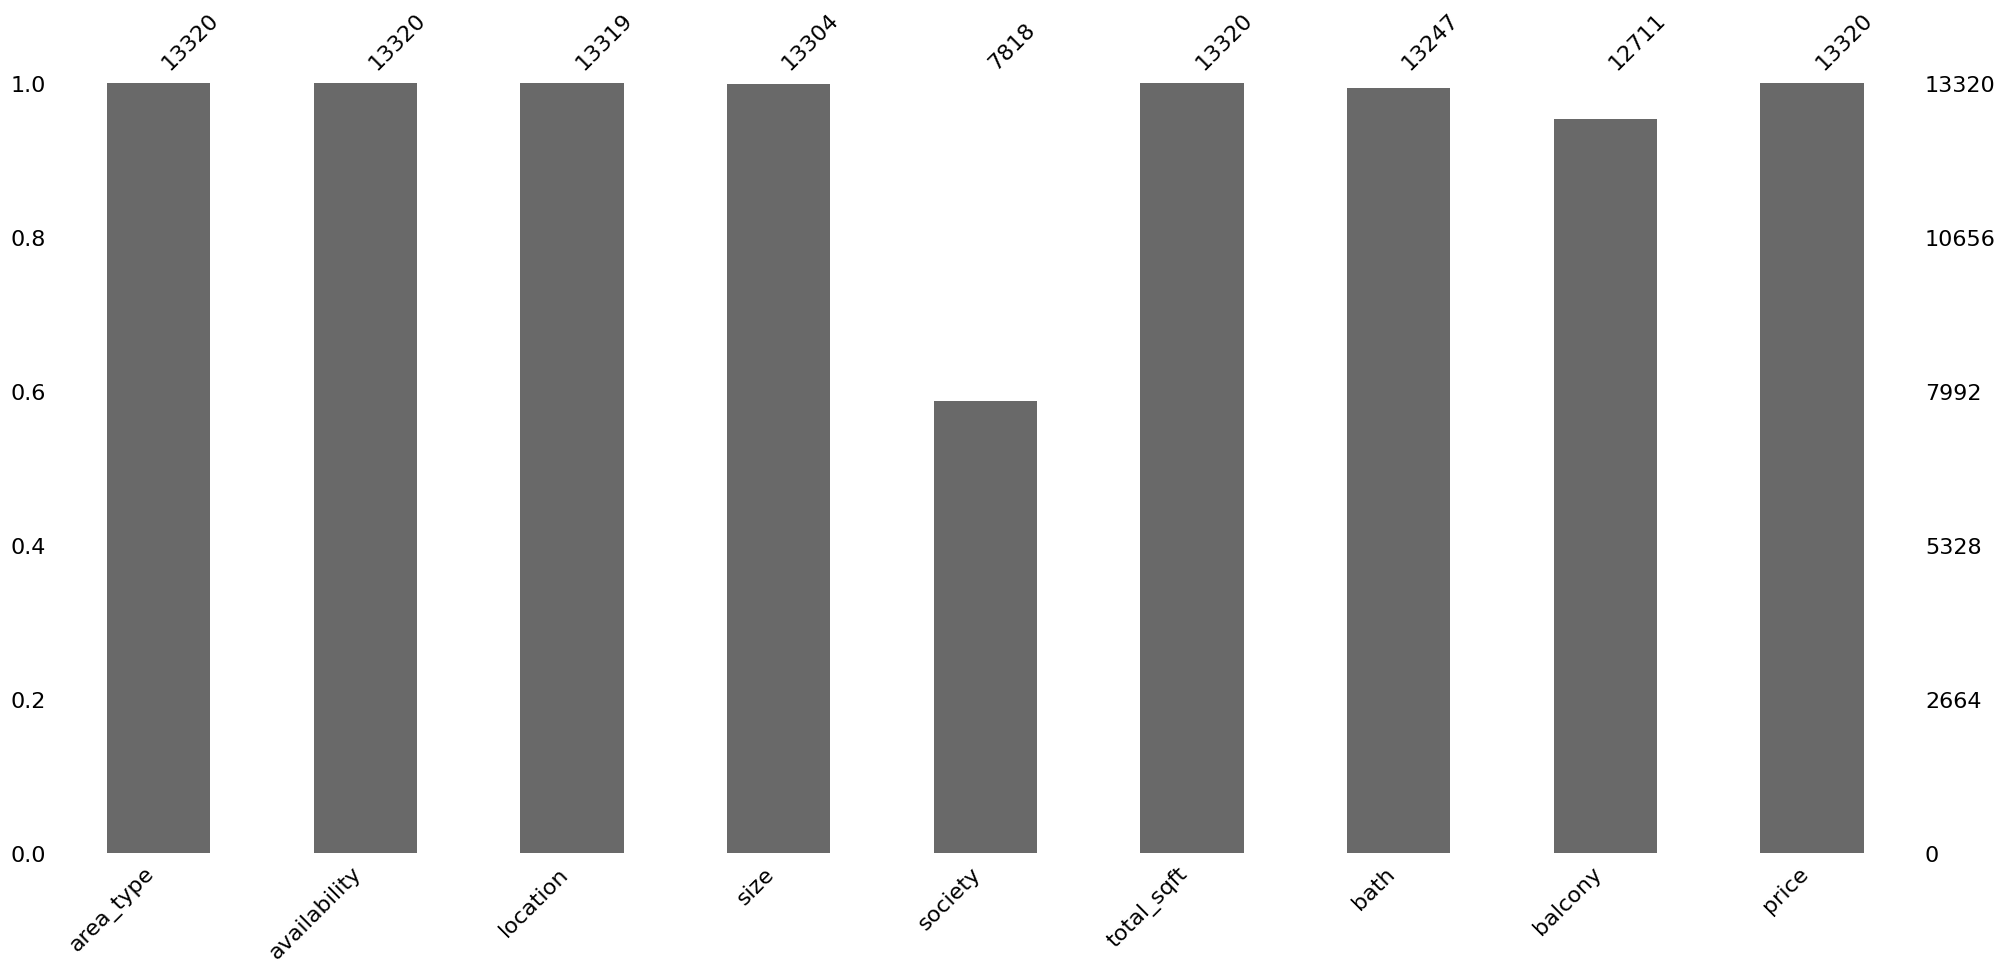

In [7]:
#using msno package to visualize the number of missing values
import missingno as msno
msno.bar(house_prices)

<Axes: >

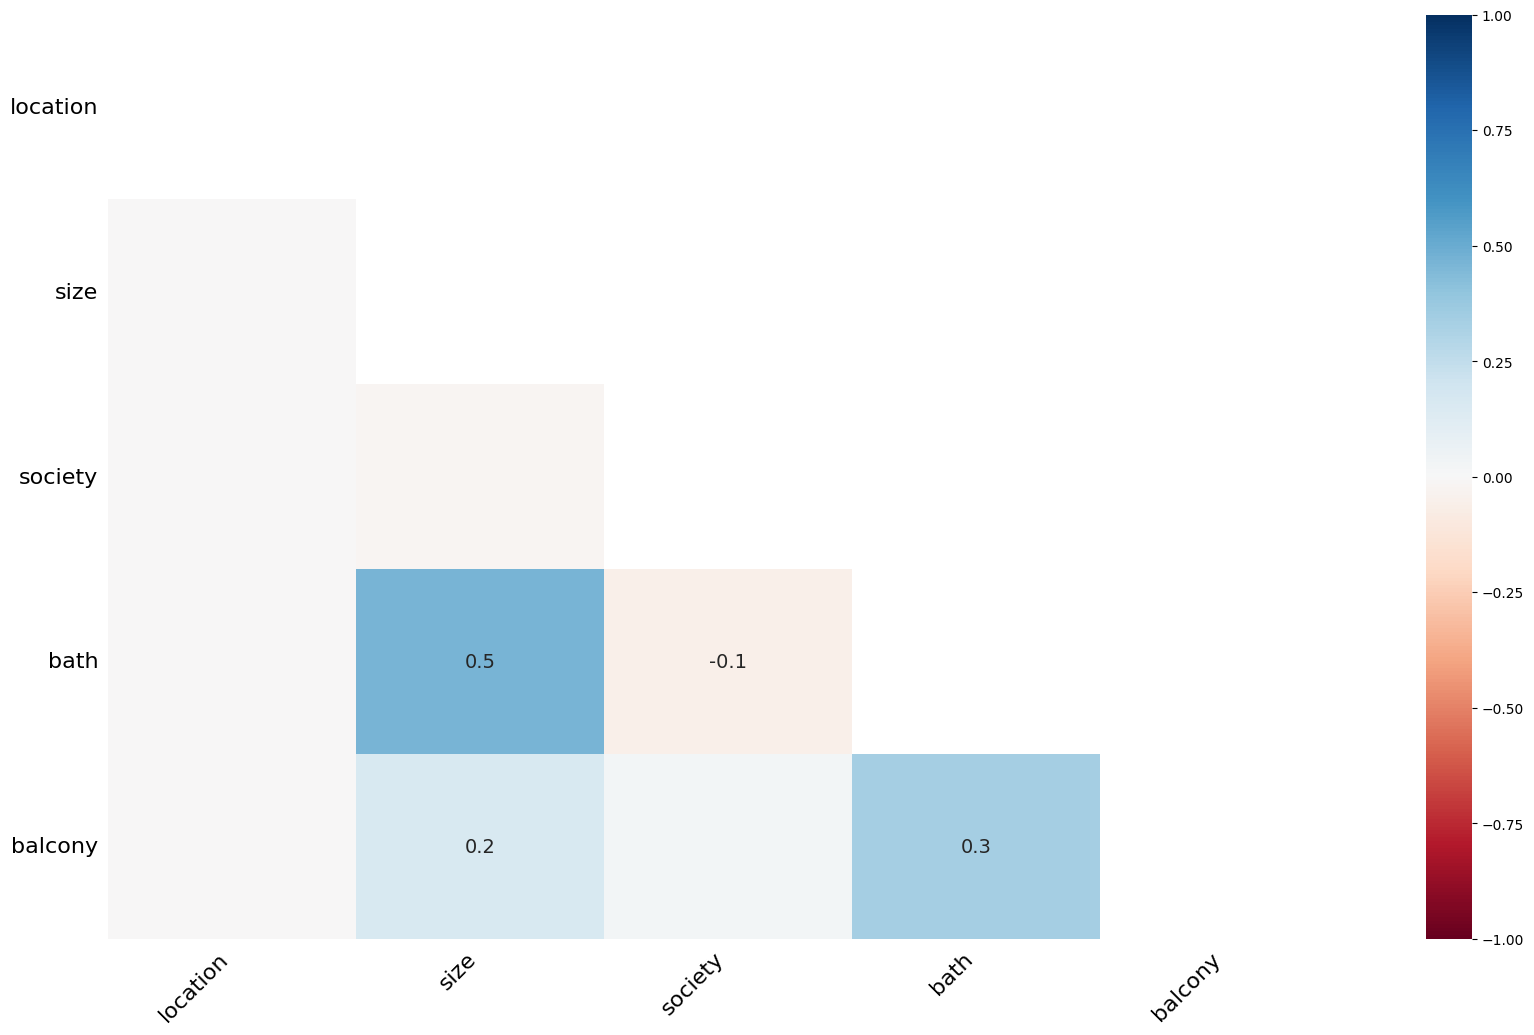

In [8]:
#Checking correlation between missing values
msno.heatmap(house_prices)

### Categorizing every column with missing values into MAR, MCAR or MNAR

### a. `location` column

In [9]:
#column location
#checking for distinct values in the location column

house_prices['location'].head()

0    Electronic City Phase II
1            Chikka Tirupathi
2                 Uttarahalli
3          Lingadheeranahalli
4                    Kothanur
Name: location, dtype: object

In [10]:
house_prices['location'].nunique()

1305

In [11]:
house_prices['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [12]:
house_prices['location'].isna().sum()

1

In [13]:
missing_row = house_prices[house_prices['location'].isnull()]

missing_row

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


#### Missing Data Analysis: `location` Column
#### It is **Missing Completely At Random (MCAR)**

This missing value is most likely categorized as **Missing Completely At Random (MCAR)**.

**Reasoning:**
- No other features in the row are missing or unusual.
- There’s no visible correlation between the missing `location` and other columns.
- The row appears completely normal except for the missing `location` field (only 1 out of 13,320 rows).
- This suggests it was likely a **data entry error** or **accidental omission**, making it **unbiased**.

**Handling:**
- Since it's just one row, we can apply the **complete-case analysis** (i.e., remove the row).

*This is a safe choice as it won’t introduce bias into our model.*

In [14]:
#column size
#checking for distinct values in the size column

house_prices["size"].nunique()

31

In [15]:
house_prices["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
house_prices["size"].isnull().sum()

16

In [17]:
house_prices[house_prices["size"].isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000


### b. `size` column

In [18]:
# Checking missing values in the 'size' column, grouped by 'area_type'
# to see if there's a correlation between 'size' and 'area_type'
missing_size_pct_by_areatype = house_prices.groupby('area_type')['size'].agg(
    lambda x: x.isnull().mean()
)

missing_size_pct_by_areatype

area_type
Built-up  Area          0.000000
Carpet  Area            0.000000
Plot  Area              0.007901
Super built-up  Area    0.000000
Name: size, dtype: float64

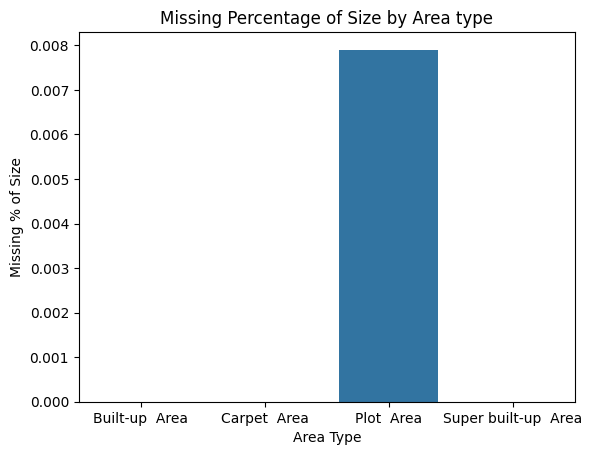

In [19]:
sns.barplot(x=missing_size_pct_by_areatype.index, y=missing_size_pct_by_areatype.values)
plt.xlabel('Area Type')
plt.ylabel('Missing % of Size')
plt.title('Missing Percentage of Size by Area type')
plt.show()

#### Missing Data Analysis: `size` Column
#### Likely **Missing At Random** (MAR)
#### Missing Values by `area_type`:

Built-up Area: 0% missing

Carpet Area: 0% missing

Plot Area: 0.79% missing

Super built-up Area: 0% missing


**Interpretation:** 

- Most `area types` have no missing `size` values.

- Only `Plot Area` has about `0.79%`missing `size` data.
  

**Why I think size is Missing in Plot Area:**

The missing `size` values in `Plot Area` could be due to:

- **Data Entry Error**: Human Errors during data input.

- **Plot Area Characteristics**: As Plot Area often refers to raw land, a size may not be applicable.


This missing data is likely **Missing At Random (MAR)**, as it relates to the Plot Area category, not randomness of missing value.


**Reasoning:**

- Missing values in `size` are tied to `area_type`.

- There's a visible correlation between missing `size` and `area_type`, especially Plot Area.

- This makes the missingness biased, not random.
  

**Handling Missing Data:**

- We can use **imputation** to fill in the missing size values for Plot Area properties.



### c. `society` column

In [20]:
#column society
#checking for distinct values in the society column

house_prices['society'].nunique()

2688

In [21]:
#column society
#checking for distinct values in the society column

house_prices['society'].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [22]:
#column society
#checking for distinct values in the society column

house_prices[house_prices['society'].isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00
10,Super built-up Area,18-Feb,Whitefield,3 BHK,NaN,1800,2.0,2.0,70.00
...,...,...,...,...,...,...,...,...,...
13310,Super built-up Area,Ready To Move,Rachenahalli,2 BHK,NaN,1050,2.0,2.0,52.71
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250.00
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,NaN,1262,2.0,2.0,47.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00


In [23]:
missing_society_by_areatype = house_prices.groupby('area_type')['society'].agg(
    lambda x: x.isnull().mean() * 100
)

missing_society_by_areatype

area_type
Built-up  Area          49.751861
Carpet  Area            37.931034
Plot  Area              84.641975
Super built-up  Area    29.032992
Name: society, dtype: float64

In [24]:
missing_society_by_location = house_prices.groupby('location')['society'].agg(
    lambda x: x.isnull().mean() * 100
)

missing_society_by_location.head(20)

location
 Anekal                                            100.000000
 Banaswadi                                           0.000000
 Basavangudi                                       100.000000
 Bhoganhalli                                         0.000000
 Devarabeesana Halli                                33.333333
 Devarachikkanahalli                                42.857143
 Electronic City                                     0.000000
 Mysore Highway                                    100.000000
 Rachenahalli                                        0.000000
 Sector 1 HSR Layout                               100.000000
 Thanisandra                                         0.000000
 Whitefield                                          0.000000
 ittamadu                                          100.000000
 south                                             100.000000
1 Annasandrapalya                                  100.000000
1 Giri Nagar                                         0.000000

#### Missing Data Insight: `society` Column

#### **Likely Missing At Random** (MAR) but MNAR cannot be ruled out too.
In this dataset, a lot of the rows have missing values in the society column — **over 41% of our data**. 
Based on `location` and `areatype`,
- Some locations have 100% missing values (e.g., Anekal, Mysore Highway, etc.)
- Others have 0% missing (e.g., Whitefield, Thanisandra, Rachenahalli)
- Some are in-between (e.g., Devarachikkanahalli at ~43%)

- Plot Area → 84% missing
- Super Built-up Area → ~29% missing
- Carpet Area → ~38% missing
- Built-up Area → ~50% missing

This pattern suggests that the missingness of society is linked to observable factors like `location` and `area_type`. As a result, the missingness is likely **Missing At Random (MAR)**, where the missing values depend on observed variables such as location and area type.

However, due to the high overall missingness (41%) and the possibility of deliberate omission in properties that may be underdeveloped or less prestigious (which might not be captured in other variables), I am  also inferring that **Missing Not At Random (MNAR)** cannot be fully ruled out.

### d. `bath` column

In [25]:
house_prices[house_prices['bath'].isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,Jurdsig,1520 - 1740,NaN,NaN,74.820
344,Super built-up Area,21-Dec,Kanakpura Road,1 BHK,PrarePa,525,NaN,NaN,21.530
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
...,...,...,...,...,...,...,...,...,...
11496,Super built-up Area,21-Dec,Kanakpura Road,1 BHK,PrarePa,525,NaN,NaN,27.000
11569,Plot Area,Immediate Possession,Hosur Road,NaN,AVeldun,1350,NaN,NaN,8.440
12768,Built-up Area,18-Mar,Bettahalsoor,5 Bedroom,Toainnt,3210,NaN,NaN,353.000
12861,Super built-up Area,21-Dec,KR Puram,4 BHK,Moquach,2204 - 2362,NaN,NaN,121.000


In [26]:
missing_bath_by_size = house_prices.groupby('size')['bath'].agg(
    lambda x: x.isnull().mean() * 100
)

missing_bath_by_size.sort_values(ascending = False)

size
5 BHK         3.389831
4 BHK         2.368866
1 BHK         1.301115
4 Bedroom     0.968523
3 BHK         0.533643
5 Bedroom     0.336700
3 Bedroom     0.182815
2 BHK         0.019234
9 BHK         0.000000
8 Bedroom     0.000000
8 BHK         0.000000
7 Bedroom     0.000000
7 BHK         0.000000
6 Bedroom     0.000000
6 BHK         0.000000
43 Bedroom    0.000000
27 BHK        0.000000
1 Bedroom     0.000000
2 Bedroom     0.000000
19 BHK        0.000000
18 Bedroom    0.000000
16 BHK        0.000000
14 BHK        0.000000
13 BHK        0.000000
12 Bedroom    0.000000
11 Bedroom    0.000000
11 BHK        0.000000
10 Bedroom    0.000000
10 BHK        0.000000
1 RK          0.000000
9 Bedroom     0.000000
Name: bath, dtype: float64

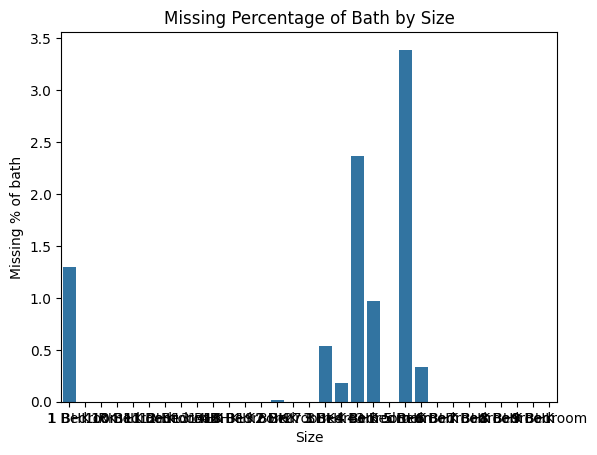

In [27]:
sns.barplot(x=missing_bath_by_size.index, y=missing_bath_by_size.values)
plt.xlabel('Size')
plt.ylabel('Missing % of bath')
plt.title('Missing Percentage of Bath by Size')
plt.show()

In [28]:
missing_bath_by_totalsqft = house_prices.groupby('total_sqft')['bath'].agg(
    lambda x: x.isnull().mean() * 100
)

missing_bath_by_totalsqft.sort_values(ascending = False)

total_sqft
4400 - 6800    100.0
2324           100.0
1500 - 2400    100.0
1440 - 1884    100.0
1410 - 1710    100.0
               ...  
1626             0.0
1625             0.0
1623.29          0.0
1623             0.0
999              0.0
Name: bath, Length: 2117, dtype: float64

#### Missing Data Analysis - `bath` column
#### Likely **Missing At Random (MAR)**
I explored its relationship with two key features: `size` and `total_sqft`, which logically relate to the number of bathrooms a house might have.

There’s clear variation in missing percentages depending on the feature `size`:
- Smaller properties like 1 BHK, 2 BHK have low missingness.
- As we move up to 3 BHK, 4 BHK, and 5 BHK, the missing percentages rise (e.g., 3 BHK → ~0.53%, 4 BHK → ~2.37%, 5 BHK → ~3.39%).
- This suggests a possible pattern: larger properties are slightly more likely to have missing bathroom values.
- Most total_sqft values show 0% missing for bath, with only rare exceptions (like one range entry: "1020 - 1130" showing 100% missing). This might just be a fluke due to a very small sample size in that specific entry.

These findings suggest that missingness in bath is related to observable variables like size (possibly also mildly to total_sqft). That means:

- The missing data isn't completely random (so not MCAR).
- There's no strong reason to assume people withhold bathroom info due to the number of bathrooms itself (so not obviously MNAR).
- But the missing values vary by feature characteristics, especially feature size hence it's likely **Missing At Random** (MAR).


### e. `balcony` column

In [29]:
missing_balcony_pct_by_areatype = house_prices.groupby('area_type')['balcony'].agg(
    lambda x: x.isnull().mean() * 100
)

missing_balcony_pct_by_areatype.sort_values(ascending = False)

area_type
Plot  Area              9.283951
Carpet  Area            5.747126
Built-up  Area          4.466501
Super built-up  Area    3.503982
Name: balcony, dtype: float64

In [30]:
missing_balcony_pct_by_totalsqft = house_prices.groupby('total_sqft')['balcony'].agg(
    lambda x: x.isnull().mean() * 100
)

sorted_missing_values = missing_balcony_pct_by_totalsqft.sort_values(ascending = False)
sorted_missing_values.head(50)

total_sqft
1                  100.0
4273               100.0
4097               100.0
1500 - 2400        100.0
4125Perch          100.0
1482 - 1846        100.0
1482 - 1684        100.0
4260 - 4408        100.0
4303               100.0
800 - 2660         100.0
4350               100.0
1450 - 1595        100.0
4400 - 6640        100.0
4400 - 6800        100.0
1446 - 1506        100.0
4460               100.0
4050 - 4075        100.0
1520 - 1740        100.0
3950               100.0
3905               100.0
1544               100.0
3785               100.0
1564 - 1850        100.0
3692               100.0
3657               100.0
361.33Sq. Yards    100.0
3606 - 5091        100.0
3602               100.0
3584               100.0
1610 - 1880        100.0
3504               100.0
3500 - 3600        100.0
1618 - 1929        100.0
4470               100.0
1440 - 1884        100.0
1430 - 1630        100.0
6136               100.0
7400               100.0
1200 - 1800        100.0
1200 - 2400   

In [31]:
missing_balcony_pct_by_size = house_prices.groupby('size')['balcony'].agg(
    lambda x: x.isnull().mean() * 100
)

missing_balcony_pct_by_size.sort_values(ascending = False)

size
16 BHK        100.000000
10 BHK        100.000000
19 BHK        100.000000
18 Bedroom    100.000000
10 Bedroom     75.000000
11 BHK         50.000000
8 BHK          40.000000
5 BHK          38.983051
9 BHK          37.500000
9 Bedroom      36.956522
6 BHK          23.333333
8 Bedroom      22.619048
4 BHK          17.258883
7 Bedroom      16.867470
6 Bedroom      11.518325
5 Bedroom      11.447811
4 Bedroom       9.322034
7 BHK           5.882353
3 BHK           4.199536
3 Bedroom       3.656307
1 BHK           1.486989
2 BHK           0.904020
2 Bedroom       0.303951
43 Bedroom      0.000000
1 Bedroom       0.000000
14 BHK          0.000000
13 BHK          0.000000
12 Bedroom      0.000000
11 Bedroom      0.000000
1 RK            0.000000
27 BHK          0.000000
Name: balcony, dtype: float64

#### Missing Data Analysis - `balcony` column
The missing values in `balcony` are mostly **MAR (Missing At Random)** — they depend on observed features like:

- `size`: Higher BHK units (10–19 BHK) show more missingness.

- `area_type`: Plot Area (land-only) has ~9% missing values.

- `total_sqft`: Unusual sqft ranges show increased missingness.

This pattern means we can use other features to predict or impute the missing values.

However, Weird cases like 43 Bedroom or 27 BHK:
These extreme or rare entries have 100% missing — might be data entry issues.

These could point toward MNAR, especially if missingness is due to luxury or how expensive they are. Rare/luxury listings with 100% missing values may involve MNAR — likely due to intentional omission so MNAR can also not be ruled out.

### 2. Data Aggregation and Grouping

In [32]:
#reading the dataset
covid_data = pd.read_csv('covid.csv')

covid_data.head(50)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
5,2020-01-25,Orange,California,6059.0,1,0.0
6,2020-01-25,Cook,Illinois,17031.0,1,0.0
7,2020-01-25,Snohomish,Washington,53061.0,1,0.0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0.0
9,2020-01-26,Los Angeles,California,6037.0,1,0.0


In [33]:
#the shape of columns and rows
covid_data.shape

(884737, 6)

In [34]:
#missing values
covid_data.isnull().sum()

date          0
county        0
state         0
fips       8266
cases         0
deaths    18761
dtype: int64

In [35]:
#summary of the average no of covid_cases by state
avg_case_by_state = covid_data.groupby('state')['cases'].mean()

avg_case_by_state

state
Alabama                      1701.467328
Alaska                        430.746604
Arizona                     10717.680837
Arkansas                      868.880665
California                  10414.212011
Colorado                     1327.784424
Connecticut                  6598.018781
Delaware                     4525.352941
District of Columbia        12148.736667
Florida                      7083.964150
Georgia                      1376.500166
Guam                         2977.215753
Hawaii                       1734.082248
Idaho                         941.318367
Illinois                     2908.284601
Indiana                      1378.878289
Iowa                          853.235057
Kansas                        593.724247
Kentucky                      573.008838
Louisiana                    1894.822155
Maine                         325.516156
Maryland                     4051.561362
Massachusetts                8420.184743
Michigan                     1802.004792
Minnesota 

In [36]:
#summary statistics of the summarization
avg_case_by_state.describe()

count       55.000000
mean      2551.800876
std       2959.525102
min         31.743852
25%        720.395220
50%       1378.878289
75%       2707.532450
max      12148.736667
Name: cases, dtype: float64

#### Summary of Average COVID-19 Cases by State

- Data includes 55 states/territories
- The average number of cases is ~2,552
- There's a wide variation (standard deviation ~2,960)
- Lowest average: ~32 cases (likely a small territory like the Northern Mariana Islands)
- Highest average: ~12,149 cases (possibly District of Columbia)
- Half of the states had fewer than ~1,379 cases (median)
- 75% of states had under ~2,708 cases, showing that high averages are driven by a few states

On average, each state or territory had about 2,552 COVID-19 cases. However, the numbers varied a lot from place to place. Some places had as few as 32 cases, while others had over 12,000.

Half of the states had fewer than 1,379 cases, and most (about 75%) had less than 2,708 cases. This shows that a few states had very high numbers, which increased the overall average.

### 3. Time Series Analysis

In [37]:
#loading the COVID dataset

covid = pd.read_csv('covid.csv')

covid

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
884732,2020-12-31,Sweetwater,Wyoming,56037.0,2966,16.0
884733,2020-12-31,Teton,Wyoming,56039.0,2138,4.0
884734,2020-12-31,Uinta,Wyoming,56041.0,1558,7.0
884735,2020-12-31,Washakie,Wyoming,56043.0,780,19.0


In [38]:
#checking the data type
covid['date'].dtype

dtype('O')

In [39]:
#converting to datetime object
covid['date'] = pd.to_datetime(covid['date'])

In [40]:
#Checking the data type
covid['date'].dtype

dtype('<M8[ns]')

In [41]:
#first 5 rows
covid.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [42]:
### To visualize the state with more cases by state (District of Columbia)
DC = covid[covid['state'] == 'District of Columbia']

DC.head()


,date,county,state,fips,cases,deaths
682,2020-03-07,District of Columbia,District of Columbia,11001.0,1,0.0
778,2020-03-08,District of Columbia,District of Columbia,11001.0,1,0.0
895,2020-03-09,District of Columbia,District of Columbia,11001.0,4,0.0
1030,2020-03-10,District of Columbia,District of Columbia,11001.0,4,0.0
1199,2020-03-11,District of Columbia,District of Columbia,11001.0,10,0.0


In [43]:
### resampling to monthly covid cases

DC_per_month = (
    covid.set_index('date')
    .resample('ME')['cases']
    .sum()
)

DC_per_month

date
2020-01-31           41
2020-02-29          736
2020-03-31      1095533
2020-04-30     19611708
2020-05-31     45452114
2020-06-30     65288844
2020-07-31    111626136
2020-08-31    166758528
2020-09-30    199758786
2020-10-31    252794114
2020-11-30    338932078
2020-12-31    525970605
Freq: ME, Name: cases, dtype: int64

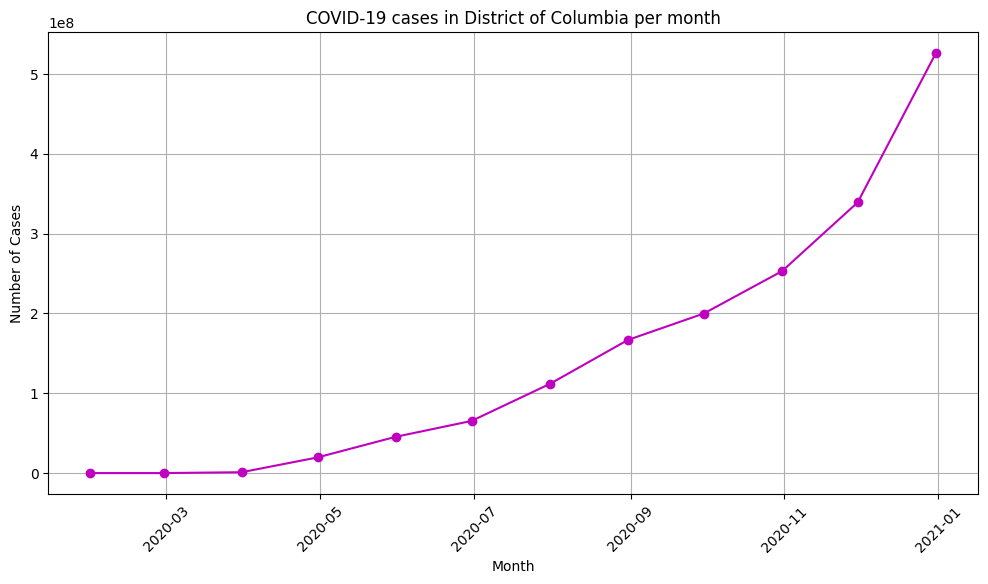

In [44]:
# using matplotlib to visualize this time series trend

plt.figure(figsize=(12, 6))
plt.plot(DC_per_month.index, DC_per_month.values, marker='o', color='m')
plt.title('COVID-19 cases in District of Columbia per month')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

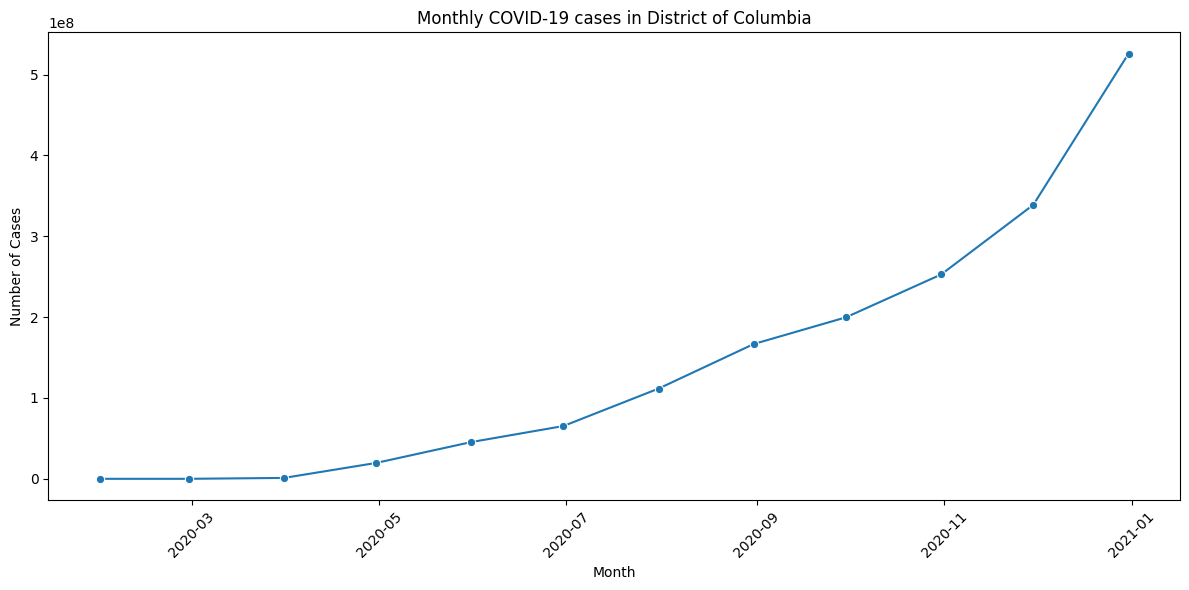

In [45]:
### using sns lineplot to visualize this trend

DC_per_month = (
    covid.set_index('date')
    .resample('ME')['cases']
    .sum().reset_index()
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=DC_per_month, x='date', y='cases', marker='o')

plt.title('Monthly COVID-19 cases in District of Columbia')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()